# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on two variational parameters: $\sigma$ and $\mu$</span>.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

Per prima cosa ho dovuto implementare varie funzioni che calcolassero la funzione d'onda ('Psi'), il suo modulo quadro ('Psi_Squared'), la sua derivata seconda ('Psi_Second_Derivate') e il potenziale ('Potential'). In seguito ho implementato la funzione 'Step' che effetua il passo dell'algoritmo di Metropolis in questo modo:

```cpp
void Step(Random &rnd, double &x, double rho, double &attempted, double &accepted, double sigma, double mu) {
   double x_new = x + rnd.Rannyu(-1,1)*rho;
   double A = std::min(1.0,(Psi_Squared(x_new, sigma, mu)/Psi_Squared(x, sigma, mu)));
   double r = rnd.Rannyu();
   if (r <= A) {
      x = x_new;
      accepted++;
   }
   attempted++;
};
```

Ho quindi utilizzato i seguenti parametri per effettuare due simulazioni del valore di $\langle {\hat H} \rangle_T$ tramite il calcolo della funzione d'onda e della sua derivata seconda implementate nel file 'functions.h':

1. Numero di blocchi = 100
2. Lunghezza dei blocchi = 10000
3. $\delta$ = 2
4. $\mu_1$ = 0
5. $\sigma_1$ = 1
6. $\mu_2$ = 1
7. $\sigma_2$ = 0.5

Ho effettuato due simulazioni con due diversi valori di $\mu$ e $\sigma$ e i seguenti grafici riportano il valore dell'energia lungo i 100 blocchi con la ripsettiva incertezza. Per tutte le simulazioni da qui in avanti è prevista una fase di equilibrazione che fa evolvere il sistema "a vuoto" per 100 blocchi da 1000 step.

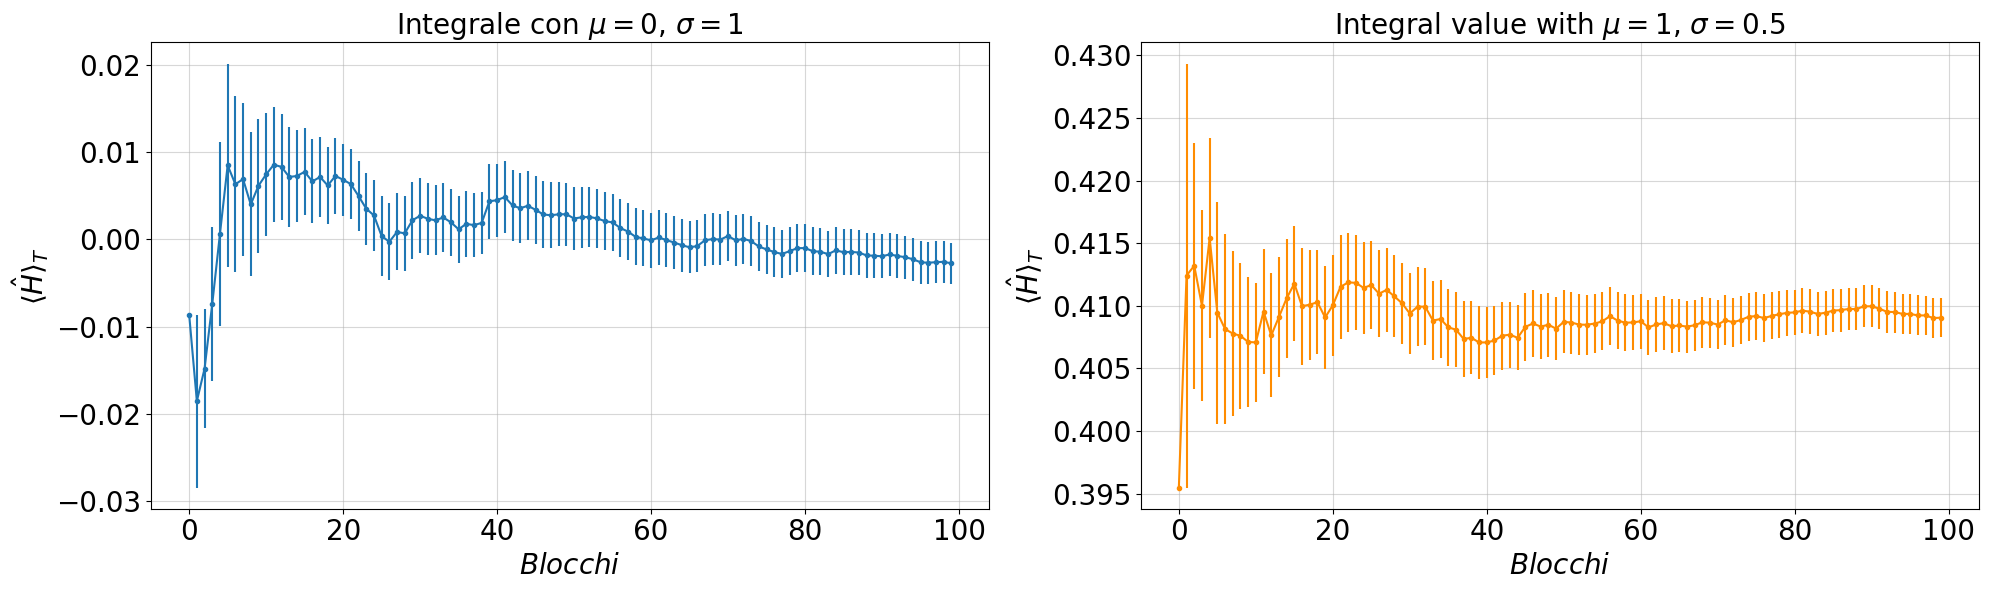

In [2]:
import scipy
from scipy.special import erf
import numpy as np
from numpy import exp
from numpy.lib.scimath import log, sqrt
import matplotlib
import matplotlib.pyplot as plt
import math
import pandas as pd

x,y,err = np.loadtxt('./Esercizio_08.1/OUTPUT/output.dat', usecols = (0, 1, 2), unpack = True)
x_2,y_2,err_2 = np.loadtxt('./Esercizio_08.1/OUTPUT/output_2.dat', usecols = (0, 1, 2), unpack = True)

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.title('Integrale con $\mu=0$, $\sigma=1$', fontsize = 20)
plt.errorbar(x,y,yerr=err, linewidth=1.5, marker='o', markersize=3)
plt.xlabel('$Blocchi$', fontsize=20)
plt.ylabel(r'$\langle {\hat H} \rangle_T$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, alpha=0.5)

plt.subplot(1, 2, 2)
plt.title('Integral value with $\mu=1$, $\sigma=0.5$', fontsize = 20)
plt.errorbar(x_2,y_2,yerr=err_2, linewidth=1.5, marker='o', markersize=3, color='darkorange')
plt.xlabel('$Blocchi$', fontsize=20)
plt.ylabel(r'$\langle {\hat H} \rangle_T$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

Di seguito sono riportati i moduli quadri delle due funzioni d'onda. I risultati sono compatibili tra simulazione e teoria.

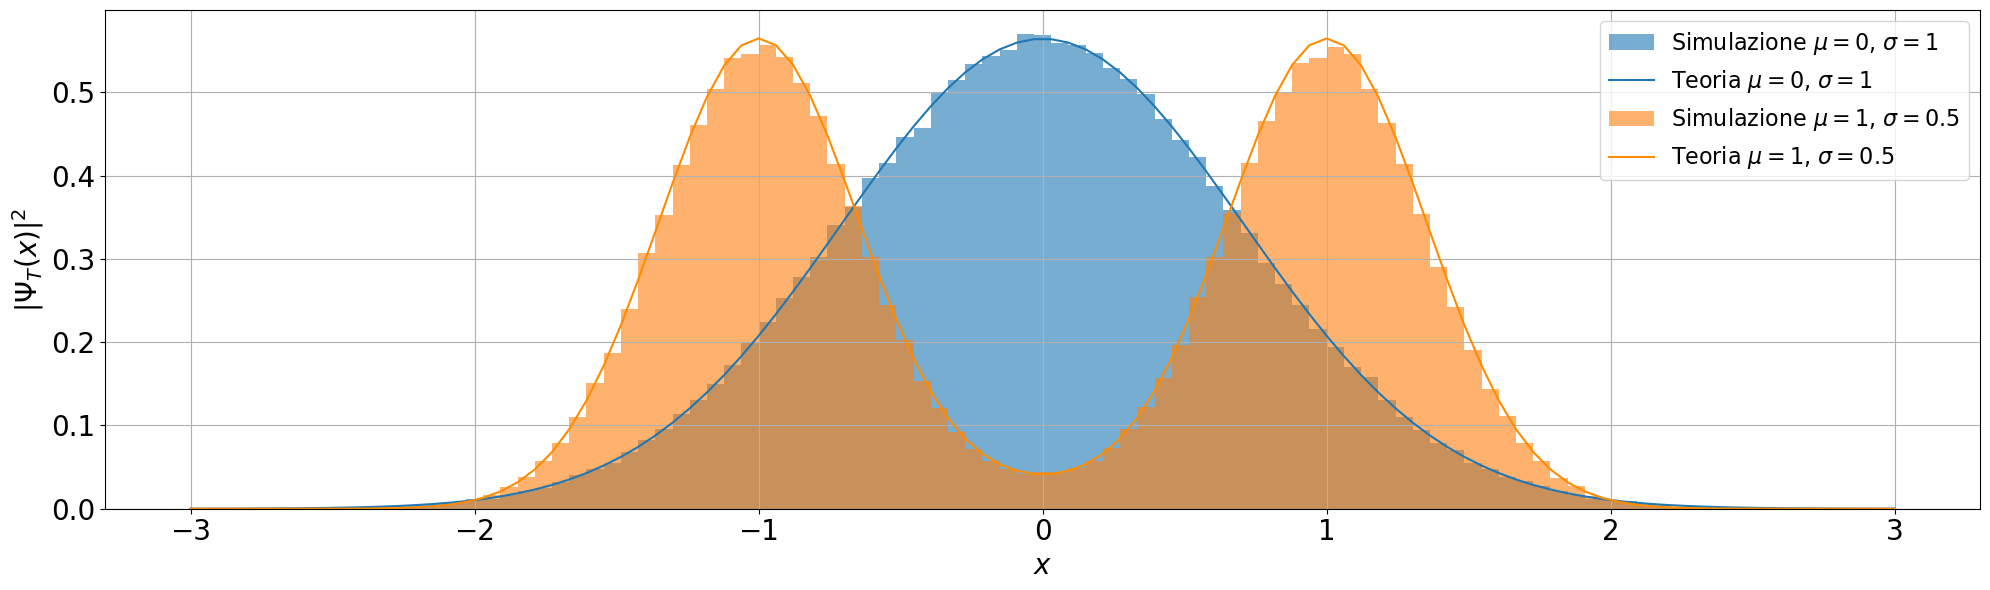

In [67]:
def EvalWaveFunctionSquared(x, mu, sigma):
    return (np.exp(-(x-mu)**2/(2*sigma**2))+np.exp((-(x+mu)**2/(2*sigma**2))))**2

plt.figure(figsize=(20, 6))

positions=np.loadtxt('./Esercizio_08.1/OUTPUT/position.dat')
plt.hist(positions, density = True, bins = np.linspace(-3, 3, 100), label = 'Simulazione $\mu=0$, $\sigma=1$', alpha = 0.6)
plt.plot(np.linspace(-3, 3, 100), 1/(4 * np.sqrt(np.pi)) * EvalWaveFunctionSquared(np.linspace(-3, 3, 100), 0, 1), label = 'Teoria $\mu=0$, $\sigma=1$', c='tab:blue')

positions=np.loadtxt('./Esercizio_08.1/OUTPUT/position_2.dat')
plt.hist(positions, density = True, bins = np.linspace(-3, 3, 100), label='Simulazione $\mu=1$, $\sigma=0.5$', alpha = 0.6)
plt.plot(np.linspace(-3, 3, 100), 1/(np.sqrt(np.pi)) * EvalWaveFunctionSquared(np.linspace(-3, 3, 100), 1, 0.5), color = 'darkorange', label = 'Teoria $\mu=1$, $\sigma=0.5$')

plt.legend(fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$|\Psi_T(x)|^2$', fontsize=20)
plt.grid()
plt.tight_layout()
plt.show()

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>
- show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

In questo codice ho utilizzato una valore della temperatura iniziale pari a 2 che volve nel corso dell'ottimizzazione secondo una legge del tipo:

<div style="text-align: center;">

$T(i+1) = T(i)*0.997$

</div>

finchè $T>0.01$. Lungo il corso dell'ottimizzazione faccio evolvere i valori dei parametri $\mu$ e $\sigma$ in questo modo:

```cpp
    sigma = abs(old_sigma + rnd.Rannyu(-1, 1) * .25 * T);
    mu = abs(old_mu + rnd.Rannyu(-1, 1) * .5 * T);
```
   
e salvo i parametri $\mu$ e $\sigma$ tali che l'energia sia la minore possibile. Una volta trovati i parametri ottimali ho rieseguito l'equilibrazione da zero e una simulazione con questi appositi valori di $\mu$ e $\sigma$.

I seguenti plot riportano rispettivamente i valori di energia esplorati lungo il corso dell'ottimizzazione della temperatura in funzione di $\beta = 1/T$, il valore dell'energia con la rispettiva incertezza una volta trovato il set di parametri che ottimizza l'Hamiltoniana e infine il confronto tra il modulo quadro della funzione d'onda confrontata con la soluzione numerica ottenuta trasfomrnado l'equazione di Schrodinger in un'equazione matriciale.

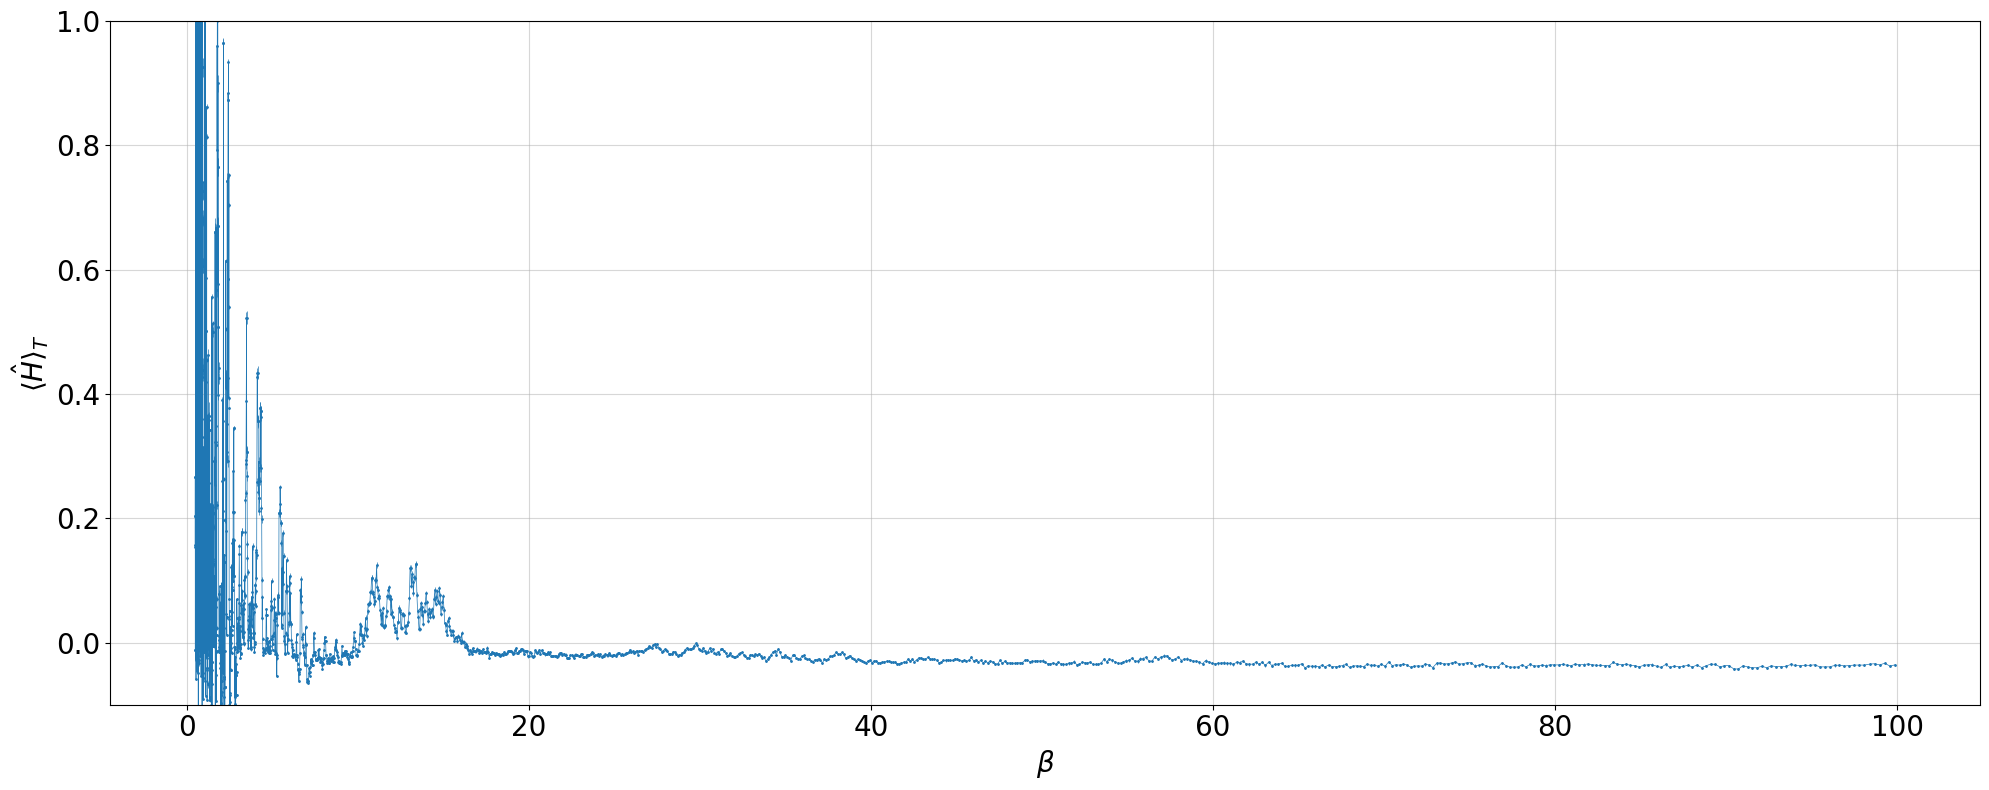

In [33]:
T, H, err = np.loadtxt('./Esercizio_08.2/OUTPUT/optimization.dat', usecols = (0, 1, 2), unpack = True)

plt.figure(figsize=(20, 8))
plt.errorbar(1/T,H,yerr=err, linewidth=0.5, marker='o', markersize=1)
plt.xlabel(r'$\beta$', fontsize=20)
plt.ylabel(r'$\langle {\hat H} \rangle_T$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, alpha=0.5)
plt.ylim(-0.1,1)

plt.tight_layout()
plt.show()

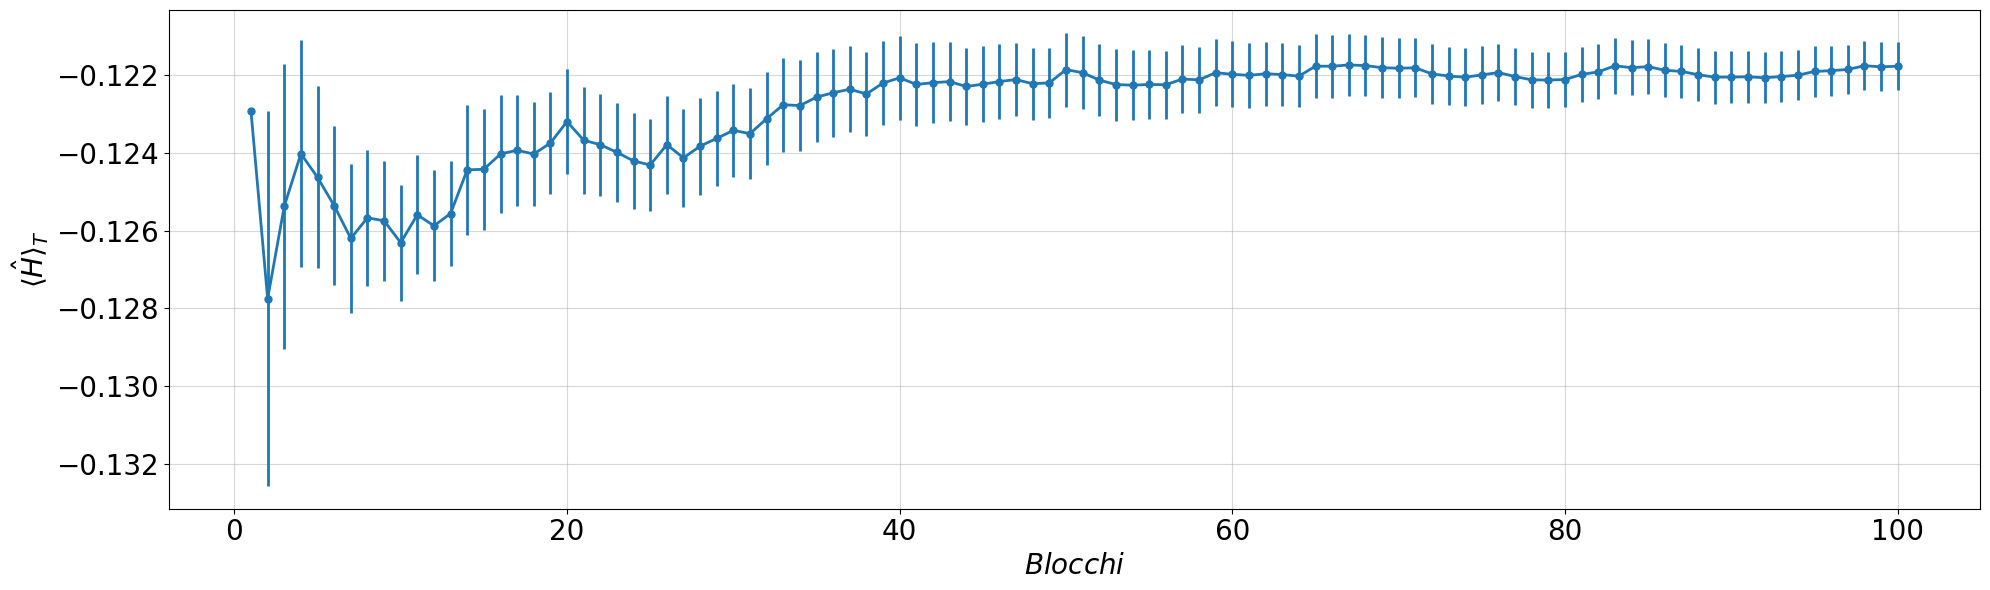

In [3]:
y, err, acc = np.loadtxt('./Esercizio_08.2/OUTPUT/output.dat', usecols = (0, 1, 2), unpack = True)

plt.figure(figsize=(20, 6))
x = list(range(1, len(y)+1))
plt.errorbar(x,y,yerr=err, linewidth=2, marker='o', markersize=5)
plt.xlabel('$Blocchi$', fontsize=20)
plt.ylabel(r'$\langle {\hat H} \rangle_T$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

Ground state energy:  -0.46045845079911807
1st excited state energy:  0.09744706661807254
2nd excited state energy:  1.9718077373830059


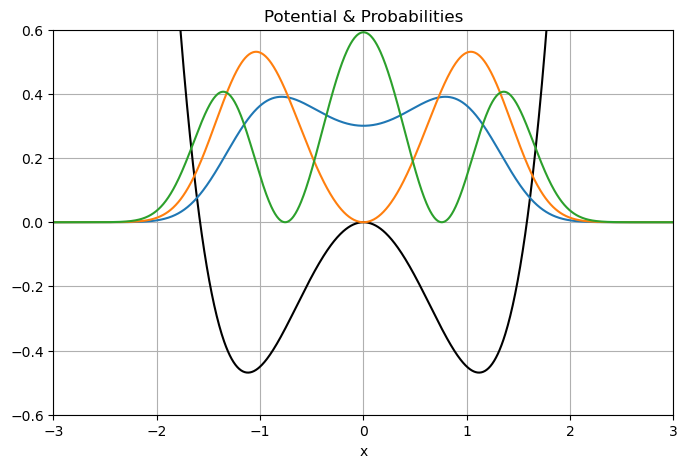

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 6
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

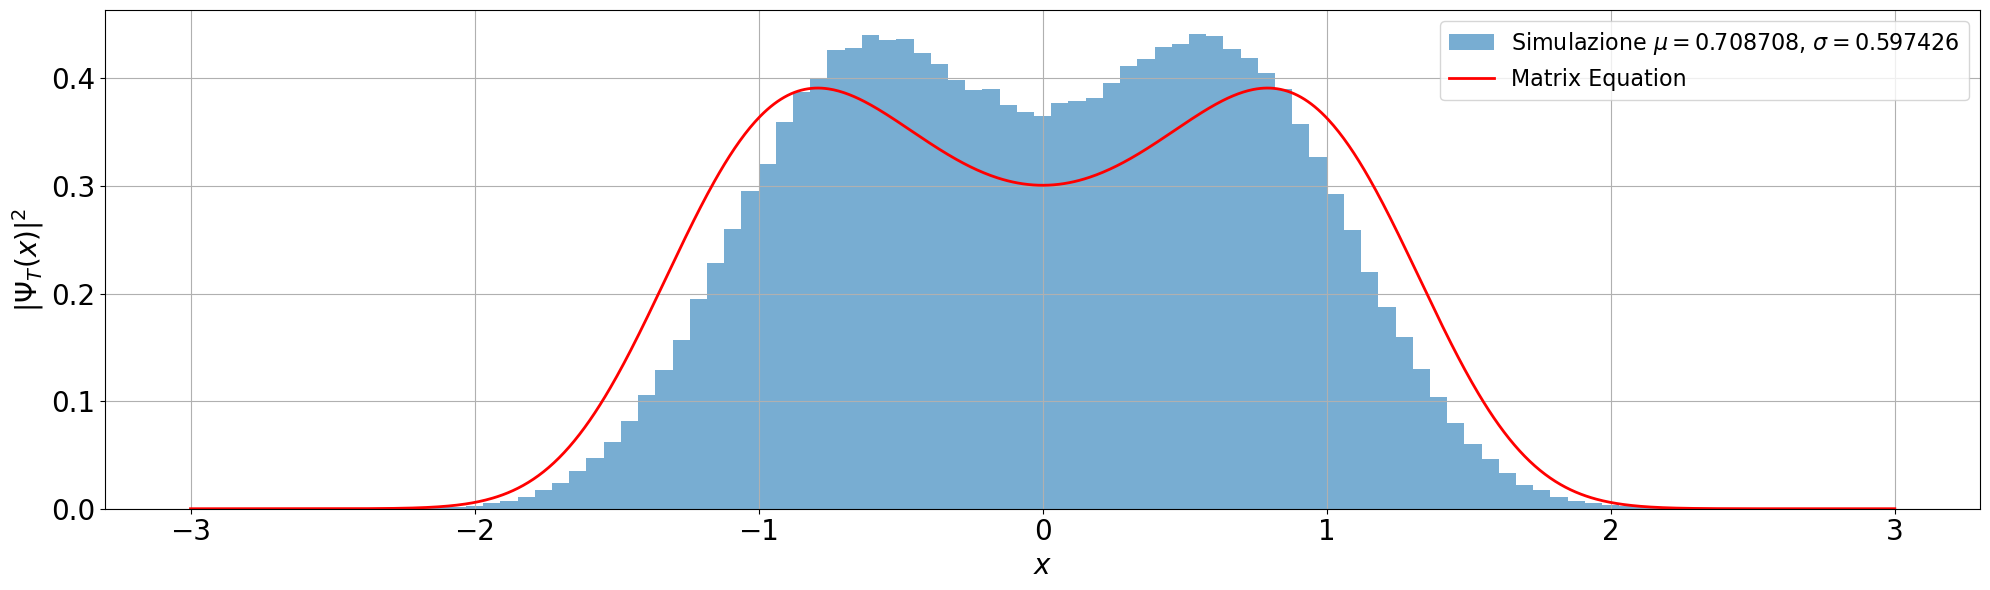

In [35]:
def EvalWaveFunctionSquared(x, mu, sigma):
    return (np.exp(-(x-mu)**2/(2*sigma**2))+np.exp((-(x+mu)**2/(2*sigma**2))))**2

plt.figure(figsize=(20, 6))

positions=np.loadtxt('./Esercizio_08.2/OUTPUT/position.dat')
sigma, mu = np.loadtxt('./Esercizio_08.2/OUTPUT/best_parameters.dat', usecols = (0, 1), unpack = True)
plt.hist(positions, density = True, bins = np.linspace(-3, 3, 100), label = 'Simulazione $\mu=$' + str(mu) + ', $\sigma=$' + str(sigma), alpha = 0.6)
x = np.linspace(-a/2, a/2, N)
plt.plot(x, psi[0]**2, label = 'Matrix Equation', c='red', linewidth=2)

plt.legend(fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$|\Psi_T(x)|^2$', fontsize=20)
plt.grid()
plt.tight_layout()
plt.show()

L'algoritmo non ha trovato la soluzione ottimale ma ci si avvicinato, si potrebbe migliorare l'esito cambiando la legge di evoluzione dei parametri $\sigma$ e $\mu$ o esplorando un range maggiore di temperature.

### <span style="color:green">Supplementary material</span>

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.

Ground state energy:  -0.46046587969271513
1st excited state energy:  0.0974247133176109
2nd excited state energy:  1.9717331343930213


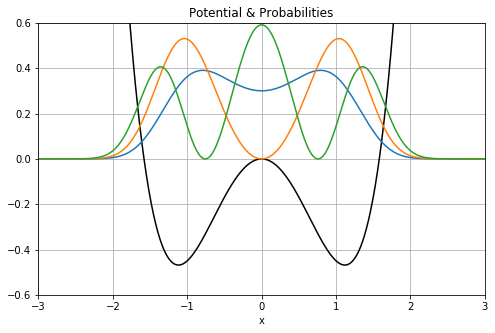

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()